### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

Independent variables - **Congruent and Non-Congruent**

Dependent variables - **Time taken to read the text**

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

**Null Hypothesis** : There is no statistical difference in Mean time taken to read Congruent and Non-congruent text.

**Alternate Hypothesis** : Mean time taken to read congruent and non-congruent experiments are statistically different.

$$ H_0 : \mu_(congruent) = \mu_(non-congruent) $$
$$ H_1 : \mu_(congruent) \neq \mu_(non-congruent) $$

In [1]:
#importing thr neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats as sm

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
#loading the data set
df =  pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
#Exploring some descriptive statistics for the data 

#Calculating Mean
Mean_Congruent,Mean_Incongruent = np.mean(df['Congruent']), np.mean(df['Incongruent'])
print(Mean_Congruent, Mean_Incongruent)

14.051125 22.0159166667


In [4]:
#Computing Median for the congruent and incongruent text
Median_Congruent , Median_Incongruent = np.median(df['Congruent']), np.median(df['Incongruent'])
print(Median_Congruent, Median_Incongruent)

14.3565 21.0175


In [5]:
df_desc = df.describe()
df_desc

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [6]:

#Calculating range for the time taken to read Congruent and Incongruent text
Range_Congruent = df.describe()['Congruent'][7] - df.describe()['Congruent'][3]
Range_Incongruent = df.describe()['Incongruent'][7] - df.describe()['Incongruent'][3]
print(Range_Congruent, Range_Incongruent)

13.698 19.568


In [7]:
#Computing Inter-quartile range for congruent and Incongruent text

Iq_congruent = df_desc['Congruent'][6] - df_desc['Congruent'][4]
Iq_noncongruent = df_desc['Incongruent'][6] - df_desc['Incongruent'][4]
print(Iq_congruent,Iq_noncongruent)

4.3055 5.33475


## Descriptive Statistics about the data
###### Below are the Measure of Central tendendency for our data :-

1. Mean for the Congruent and Incongruent data are 14.05 secs and 22.01 secs respectively.
2. Median values for congruent and incongruent data are 14.35 and 21.01 secs respectively.

###### I have calculated Range of the data set and Interquartile range to determine measure of Variability.

Range for congruent data is 13.698 secs and Incongruent data is 19.568 secs. While, Interquartile range for congruent is 4.30 secs and incongruent data is 5.33 secs.


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Text(0.5,0,'Time(secs)')

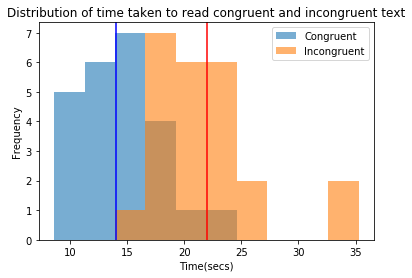

In [8]:
#PLotting histogram to visualize the distribution of data

df.plot(kind='hist',alpha = 0.6)
plt.axvline(x = df['Incongruent'].mean(), color = 'red')
plt.axvline(x = df['Congruent'].mean(), color = 'blue')

plt.title("Distribution of time taken to read congruent and incongruent text")
plt.xlabel("Time(secs)")


** It can be clearly seen in the above visualization that time taken by participants to read incongruent text is more than time to read incongruent text. **

### Plotting the Box Plot to visualize the measures of variablity like Range, interquartile range and Outliers.

Text(0,0.5,'Time taken (secs)')

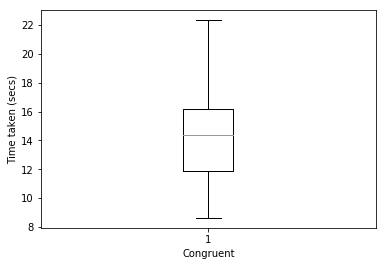

In [9]:
#plotting Box-plot for the data set

plt.boxplot(df['Congruent']);
plt.xlabel("Congruent")
plt.ylabel("Time taken (secs)")

Text(0,0.5,'Time taken (secs)')

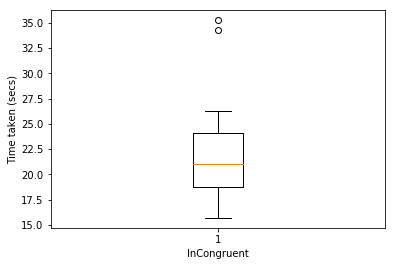

In [10]:
plt.boxplot(df['Incongruent']);
plt.xlabel("InCongruent")

plt.ylabel("Time taken (secs)")

**Box plot clearly shows the presence of outliers in case of incongruent data.**


(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

** To determine how much each participant takes time to read congruent and incongruent text , I have used **TWO SAMPLE PAIRED T-TEST**.
Confidence level associated with my test is 95%.

Following are the assumptions for our test:-
1. The observations are independent of one another.
2. The dependent variable should be approximately normally distributed.
3. The dependent variable should not contain any outliers.



In [13]:
#Performing two -tailed ttest to determine the statistical difference in data

t_Value, p_value = sm.ttest_rel(df['Congruent'], df['Incongruent'])
print(t_Value , p_value)

-8.02070694411 4.10300058571e-08


### Conclusion:


**Results shows that P-value is less than type 1 error rate of 5% i.e 0.005 (confidence level - 95%). Hence, we can reject NULL hypothesis.**

Therefore, There is statistical difference in time taken by individual to read COngruent and Incongruent text.

Results have matched our expectation as difference in time is clearly visible in data visualization above.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

In this test, two types of information are provided :-

**1. Words**

**2. Color**

Stroop effect is basically due to interference caused to our brain when we receive both of the information simultaneously.

There are two theories that may explain the Stroop effect:

**Speed of Processing Theory** :the interference occurs because words are read faster than colors are named.

**Selective Attention Theory**: the interference occurs because naming colors requires more attention than reading words

We can produce similar effect by displaying picture of FRUITS along with displaying the name of different FRUIT at the same time.